# Haarcascades
> 基於Haar的cascade分類器來實現人臉識別

<img src="data/FD.png" width="200" height="100">

In [2]:
import numpy as np
import cv2
#%matplotlib notebook
from matplotlib import pyplot as plt
print(cv2.__version__)

4.6.0


# Face and eyes

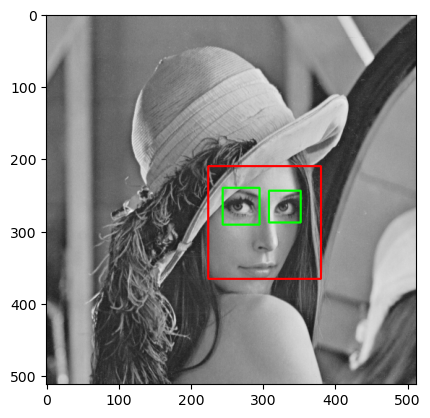

In [3]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')

filename = 'lena.png'
img = cv2.imread(filename)

imgShow = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray,scaleFactor=1.2,minNeighbors=3)
for (x,y,w,h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    imgShow = cv2.rectangle(imgShow,(x,y),(x+w,y+h),(255,0,0),2)
    eyes = eye_cascade.detectMultiScale(roi_gray,scaleFactor=1.2,minNeighbors=3,minSize=(40,40))
    for (ex,ey,ew,eh) in eyes:
        imgShow = cv2.rectangle(imgShow,(x+ex,y+ey),(x+ex+ew,y+ey+eh),(0,255,0),2)

plt.imshow(imgShow)
plt.show()

# Face and eyes with camera or vedio

In [4]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')
cap = cv2.VideoCapture(0)
while(cap.isOpened()):
    ret, img = cap.read()
    if ret==True:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray,scaleFactor=1.2,minNeighbors=3)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            eyes = eye_cascade.detectMultiScale(roi_gray,scaleFactor=1.2,minNeighbors=3,minSize=(40,40))
            for (ex,ey,ew,eh) in eyes:
                img = cv2.rectangle(img,(x+ex,y+ey),(x+ex+ew,y+ey+eh),(0,255,0),2)
        # Display the resulting frame
        cv2.imshow('frame',img)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            cap.release()
            break
    else:
        print("No video")
        cap.release()
        cv2.destroyAllWindows()
        quit()
    # When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

# 練習 - 辨識人臉自動偵測到是否配戴口罩

### step1.辨認出人臉位置，用`綠框`標示
### step2. 依據是否有出現鼻子或嘴巴作為判斷依據
### step3. 偵測到無配戴口罩時，用`紅框`標示

In [8]:
import numpy as np
import cv2
#%matplotlib notebook
from matplotlib import pyplot as plt
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
nose_cascade = cv2.CascadeClassifier('haarcascades/nose.xml')
cap = cv2.VideoCapture('data/output.avi')
while(cap.isOpened()):
    ret, img = cap.read()
    if ret==True:
        color = (0,255,0)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray,scaleFactor=1.2,minNeighbors=5)
        nose = nose_cascade.detectMultiScale(gray,scaleFactor=1.2,minNeighbors=3,minSize=(40,40))
   
        if (len(nose)!=0):
             color = (0,0,255)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            img = cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
        # Display the resulting frame
        cv2.imshow('frame',img)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            cap.release()
            break
    else:
        print("No video")
        cap.release()
        cv2.destroyAllWindows()
    # When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

TypeError: Argument 'delay' is required to be an integer